# Анализ моделей

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score,
    classification_report,
)

import os

this_dir = os.getcwd()

In [2]:
df = pd.read_excel(
    this_dir+r'\3 Данные из финансового модулятора\output.xlsx'
)

df = df[df['kind'] == 'ИО']

pred = pd.DataFrame()
fact = pd.DataFrame()
fact['fact'] = df['fact bad']
fact = fact.to_numpy()
fact = fact[:,0]

listPred = [c for c in df.columns if c.lower()[:4] == 'pred']

In [3]:
df

,index,kind,Макс просрочка,name,date,1000,1100,1200,1300,1400,...,R-score Sayfullin-Kadykov,Модель Сайфуллина-Кадыкова,pred Sayfullin-Kadykov,Z Chesser,P-score Chesser,Модель Чессера,pred Chesser,Z-score J-model,Модель PD J,pred PD J
0,0,ИО,189,ТОО Mobil Realty Management Company,2019-01-01 00:00:00,112105,0,35459,16278,1426,...,-53.777891,неудовлетворительное,1,64034.534398,1.0,неудовлетворительное,1,0.547017,0.341935,1
1,1,ИО,189,ТОО Mobil Realty Management Company,2020-01-01 00:00:00,89436,0,68032,20295,1512,...,-47.648198,неудовлетворительное,1,85814.850210,1.0,неудовлетворительное,1,0.565764,0.346123,1
2,2,ИО,189,ТОО Mobil Realty Management Company,2020-10-01 00:00:00,50332,0,80387,19169,842,...,-58.932862,неудовлетворительное,1,103501.510208,1.0,неудовлетворительное,1,0.586811,0.350854,1
3,3,ИО,0,ТОО «Молочный Завод «Солнечный»,2019-12-31 00:00:00,504839,2449010,0,4659705,0,...,-2.052959,неудовлетворительное,1,-402314.461836,0.0,удовлетворительное,0,-1.342805,0.074082,0
4,4,ИО,0,ТОО «Молочный Завод «Солнечный»,2020-12-31 00:00:00,390905,3035573,0,6243879,0,...,-1.108330,неудовлетворительное,1,-461669.028999,0.0,удовлетворительное,0,-1.242663,0.081177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,4462,ИО,0,"ТОО ""Шымкентстрой""",2018-01-01 00:00:00,7453,0,19843,559364,2666,...,2.344335,удовлетворительное,0,-32250.564964,0.0,удовлетворительное,0,-4.316069,0.004197,0
3290,4463,ИО,0,"ТОО ""Шымкентстрой""",2019-01-01 00:00:00,1139,0,166167,382261,200,...,1.529159,удовлетворительное,0,-29605.241459,0.0,удовлетворительное,0,-3.469919,0.009647,0
3291,4464,ИО,0,"ТОО ""Шымкентстрой""",2017-01-01 00:00:00,191900,0,158908,257719,0,...,1.640847,удовлетворительное,0,-14210.592489,0.0,удовлетворительное,0,-3.830059,0.006773,0
3292,4465,ИО,0,"ТОО ""Шымкентстрой""",2018-01-01 00:00:00,7453,0,19843,559364,2666,...,2.344335,удовлетворительное,0,-32250.564964,0.0,удовлетворительное,0,-4.316069,0.004197,0


## Матрица ошибок

pred Altman 2x


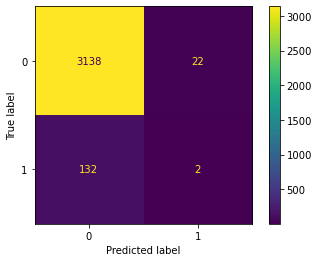

pred Altman 5x


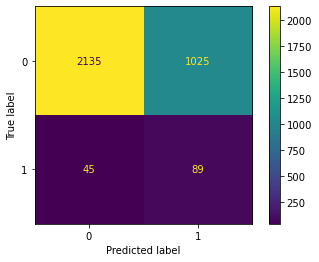

pred Tafler


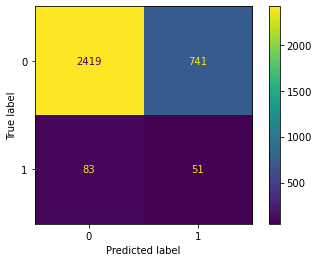

pred Fulmer


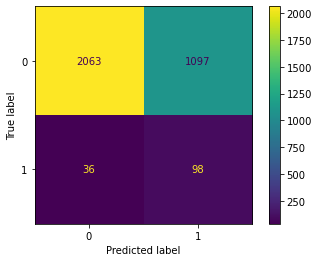

pred Springate


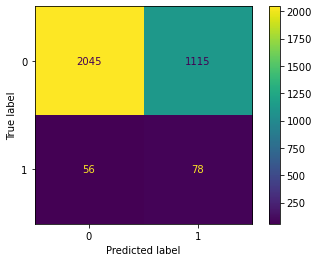

pred IGEA


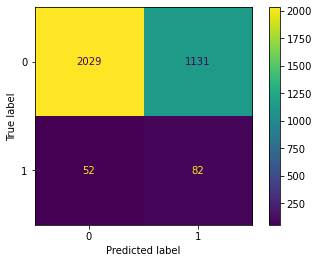

pred Lis


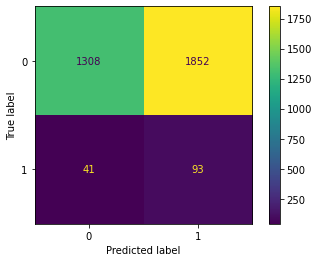

pred Sayfullin-Kadykov


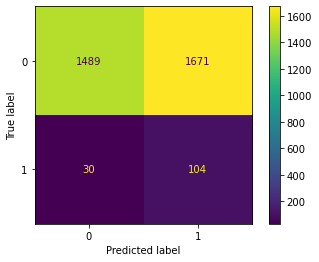

pred Chesser


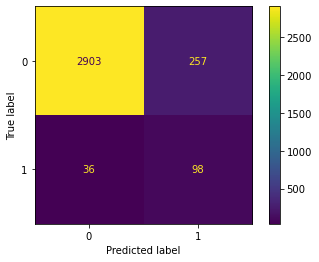

pred PD J


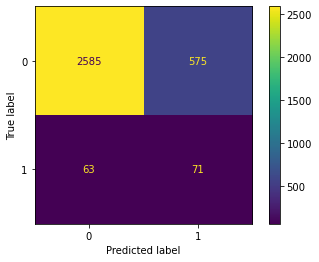

In [4]:
for i in listPred:
    print(i)
    pred = df[i]
    pred = pred.to_numpy()
    pred
    cm = confusion_matrix(fact, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

## Показатели точности модели

In [5]:
prevalence_of_data = np.sum(df['fact bad']) / len(df['fact bad']) 
print('Prevalence: {:.4%}'.format(prevalence_of_data))

Prevalence: 4.0680%


In [6]:
for i in listPred:
    pred = df[i]
    pred = pred.to_numpy()
    print(
        i[:14], '\t\t',
        'Precision: {:.2%}; \t'.format(precision_score(fact, pred)),
        'Recall: {:.2%}; \t'.format(recall_score(fact, pred)),
        'F1: {:.2%}; \t'.format(f1_score(fact, pred)),
        'AUC: {:.2f}; \t'.format(roc_auc_score(fact, pred)),
        'Gini: {:.2f}'.format(2 * roc_auc_score(fact, pred) - 1)
    )

pred Altman 2x 		 Precision: 8.33%; 	 Recall: 1.49%; 	 F1: 2.53%; 	 AUC: 0.50; 	 Gini: 0.01
pred Altman 5x 		 Precision: 7.99%; 	 Recall: 66.42%; 	 F1: 14.26%; 	 AUC: 0.67; 	 Gini: 0.34
pred Tafler 		 Precision: 6.44%; 	 Recall: 38.06%; 	 F1: 11.02%; 	 AUC: 0.57; 	 Gini: 0.15
pred Fulmer 		 Precision: 8.20%; 	 Recall: 73.13%; 	 F1: 14.75%; 	 AUC: 0.69; 	 Gini: 0.38
pred Springate 		 Precision: 6.54%; 	 Recall: 58.21%; 	 F1: 11.76%; 	 AUC: 0.61; 	 Gini: 0.23
pred IGEA 		 Precision: 6.76%; 	 Recall: 61.19%; 	 F1: 12.18%; 	 AUC: 0.63; 	 Gini: 0.25
pred Lis 		 Precision: 4.78%; 	 Recall: 69.40%; 	 F1: 8.95%; 	 AUC: 0.55; 	 Gini: 0.11
pred Sayfullin 		 Precision: 5.86%; 	 Recall: 77.61%; 	 F1: 10.90%; 	 AUC: 0.62; 	 Gini: 0.25
pred Chesser 		 Precision: 27.61%; 	 Recall: 73.13%; 	 F1: 40.08%; 	 AUC: 0.83; 	 Gini: 0.65
pred PD J 		 Precision: 10.99%; 	 Recall: 52.99%; 	 F1: 18.21%; 	 AUC: 0.67; 	 Gini: 0.35


In [7]:
for i in listPred:
    pred = df[i]
    pred = pred.to_numpy()
    print(
        i[:14],
        '\n',
        classification_report(fact, pred),
        '\n\n'
    )

pred Altman 2x 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      3160
           1       0.08      0.01      0.03       134

    accuracy                           0.95      3294
   macro avg       0.52      0.50      0.50      3294
weighted avg       0.92      0.95      0.94      3294
 


pred Altman 5x 
               precision    recall  f1-score   support

           0       0.98      0.68      0.80      3160
           1       0.08      0.66      0.14       134

    accuracy                           0.68      3294
   macro avg       0.53      0.67      0.47      3294
weighted avg       0.94      0.68      0.77      3294
 


pred Tafler 
               precision    recall  f1-score   support

           0       0.97      0.77      0.85      3160
           1       0.06      0.38      0.11       134

    accuracy                           0.75      3294
   macro avg       0.52      0.57      0.48      3294
weighted avg       0

## Корреляция показателей

### Коэффицентов

In [8]:
listCf = [c for c in df.columns if c.lower()[:2] == 'cf']
newdf = pd.DataFrame()
for i in listCf:
    newdf[i] = df[i]
    
for cat in newdf:
    quantileCat = newdf[cat].quantile(.75)
    quantileCatNegative = quantileCat*-1
    newdf.loc[newdf[cat] > quantileCat, cat] = quantileCat
    newdf.loc[newdf[cat] < quantileCatNegative, cat] = quantileCatNegative
    
newdf['fact'] = df['fact bad']
newdf['bad days'] = df['Макс просрочка']
newdf = newdf.drop(columns=['cf workingCapital', 'cf tangible assets', 'cf netLoss'])
corr_matrix = newdf.corr()
corr_matrix['bad days'].sort_values(ascending=False)

bad days                                                              1.000000
fact                                                                  0.874293
cf total_noncurrent_liabilities rate                                  0.160578
cf total_liabilities on total_assets                                  0.119380
cf total_liabilities on total_equity_and_liabilities                  0.118113
cf tangible assets log10 rate                                         0.076971
cf 6000 on cash and stocks                                            0.017263
cf total_current_liabilities on total_assets                          0.013914
cf currentRatioAltman                                                 0.009000
cf total_current_liabilities rate                                     0.001266
cf currentRatio                                                      -0.030672
cf workingCapital on EBIT                                            -0.043716
cf OPL / 6000                                       

### Баллов моделей

In [9]:
listModel = [col for col in df.columns if 'score' in col]
newdf2 = pd.DataFrame()
for i in listModel:
    newdf2[i] = df[i]
newdf2['fact'] = df['fact bad']
newdf2['bad days'] = df['Макс просрочка']
newdf2['PD J'] = df['Модель PD J']
corr_matrix2 = newdf2.corr()
corr_matrix2['bad days'].sort_values(ascending=False)

bad days                     1.000000
fact                         0.874293
P-score Chesser              0.293912
PD J                         0.167252
Z-score J-model              0.138492
Z-score Lis                  0.019909
Z-score Altman 5x            0.013043
Z-score Springate            0.006059
Z-score Altman 2x            0.003265
R-score Sayfullin-Kadykov    0.001066
R-score ИГЭА                -0.003398
Z-score Tafler              -0.006682
H-score Fulmer              -0.085980
Name: bad days, dtype: float64

In [10]:
c = -1
for i in df:
    c += 1
    print(c, i)

0 index
1 kind
2 Макс просрочка
3 name
4 date
5 1000
6 1100
7 1200
8 1300
9 1400
10 1500
11 1600
12 1700
13 2000
14 2100
15 2200
16 2300
17 2400
18 2500
19 2600
20 2700
21 2800
22 2900
23 3000
24 3100
25 3200
26 3300
27 3400
28 3500
29 4000
30 4100
31 4200
32 4300
33 4400
34 5000
35 5100
36 5200
37 5300
38 5400
39 5500
40 5600
41 5700
42 6000
43 6100
44 6200
45 6300
46 6400
47 7000
48 7100
49 7200
50 7300
51 7400
52 7500
53 7600
54 7700
55 9100
56 9200
57 9300
58 9400
59 9500
60 id
61 Unnamed: 0
62 id_raw
63 type
64 fact bad
65 fact good
66 date sys
67 data days
68 near year
69 annualizer
70 total_current_assets
71 total_noncurrent_assets
72 total_assets
73 total_current_liabilities
74 total_noncurrent_liabilities
75 total_equity
76 total_liabilities
77 total_equity_and_liabilities
78 gross_profit
79 operating_profit_or_loss
80 EBITDA
81 profit_or_loss_before_income_tax
82 EBIT
83 net_profit_or_loss
84 cf currentRatio
85 cf currentRatioAltman
86 cf total_liabilities on total_equity_and

In [11]:
dfcon1 = df.iloc[:,5:60]
dfcon2 = df.iloc[:,63:77]
dfFin = pd.concat([dfcon1, dfcon2], axis=1)
dfFin

dfFin['fact'] = df['fact bad']
dfFin['bad days'] = df['Макс просрочка']
corr_matrix2 = dfFin.corr()
corr_matrix2['bad days'].sort_values(ascending=False)

bad days    1.000000
fact        0.874293
fact bad    0.874293
3100        0.081962
9200        0.056234
              ...   
5700             NaN
6400             NaN
7500             NaN
9400             NaN
9500             NaN
Name: bad days, Length: 69, dtype: float64